<a href="https://colab.research.google.com/github/1Kote/reconhecimento_facial_IA/blob/dev_cavalcante/methods_detecting_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Métodos para detecção de faces 😀**

Quatro técnicas diferentes:


- Haar cascade (using OpenCV)
- HOG + SVM (Dlib)
- MMOD/CNN (Dlib)
- SSD (OpenCV's DNN module)



# Importação das bibliotecas

In [1]:
import cv2 # OpenCV
import numpy as np
from google.colab.patches import cv2_imshow # Visualizar imagens

In [2]:
cv2.__version__

'4.8.0'

# Detecção de faces com Haar cascade (OpenCV)

## Carregamento da imagem

In [3]:
imagem = cv2.imread('/content/drive/MyDrive/images/person.jpg')

In [4]:
imagem.shape # Informações da imagem.

(500, 560, 3)

In [5]:
# Quantidade total de dados nessa imagem.
500 * 560 * 3

840000

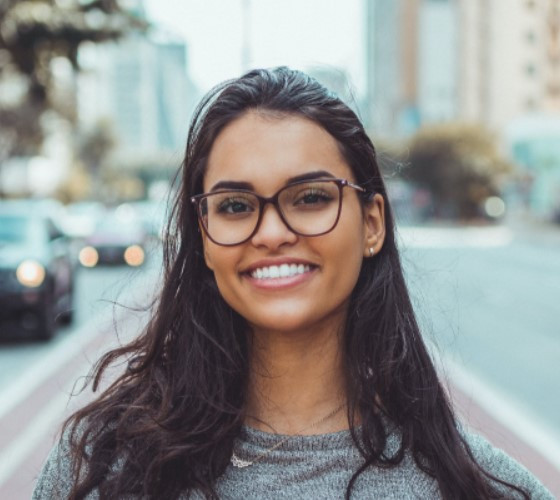

In [6]:
# Mostrar imagem.
cv2_imshow(imagem)

## Conversão para a escala de cinza

In [7]:
# Aplicando função para a conversão de escala.
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [8]:
# Verificando informações da imagem cinza.
imagem_cinza.shape

(500, 560)

In [9]:
# Quantidade total de dados nessa nova imagem.
500 * 560

280000

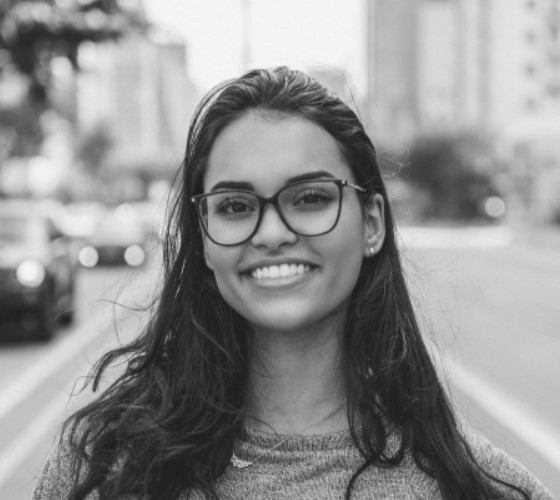

In [10]:
cv2_imshow(imagem_cinza)

## Aplicar o detector facial

In [11]:
detector_facial = cv2.CascadeClassifier('/content/drive/MyDrive/cascades/haarcascade_frontalface_default.xml')

In [12]:
deteccoes = detector_facial.detectMultiScale(imagem_cinza)

# Vetores de posicionamento das faces em uma imagem.
# [ponto X, ponto Y, width, length]
print(deteccoes)

# Número de faces detectadas.
len(deteccoes)

[[177 123 197 197]]


1

## Desenhar o retângulo na face

177 123 197 197


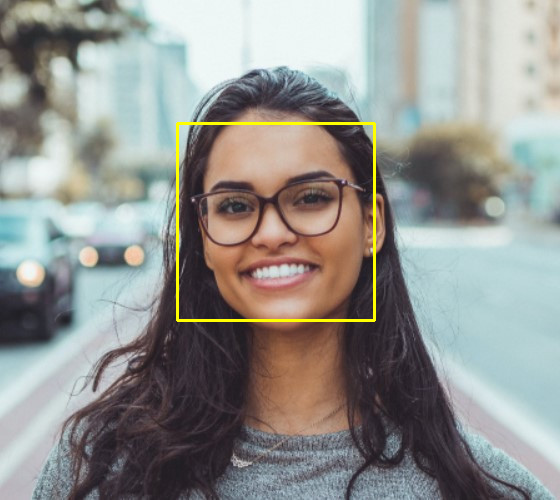

In [13]:
for (x, y, w, h) in deteccoes:
  print(x, y, w, h)
  # Parâmetros: imagem, ponto inicial, ponto final, cor da linha (BGR), largura da borda.
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 255), 2)

cv2_imshow(imagem)

# Redimensionamento de imagem

## Apresentação do problema de detecção

(1120, 1680, 3)
(1120, 1680)


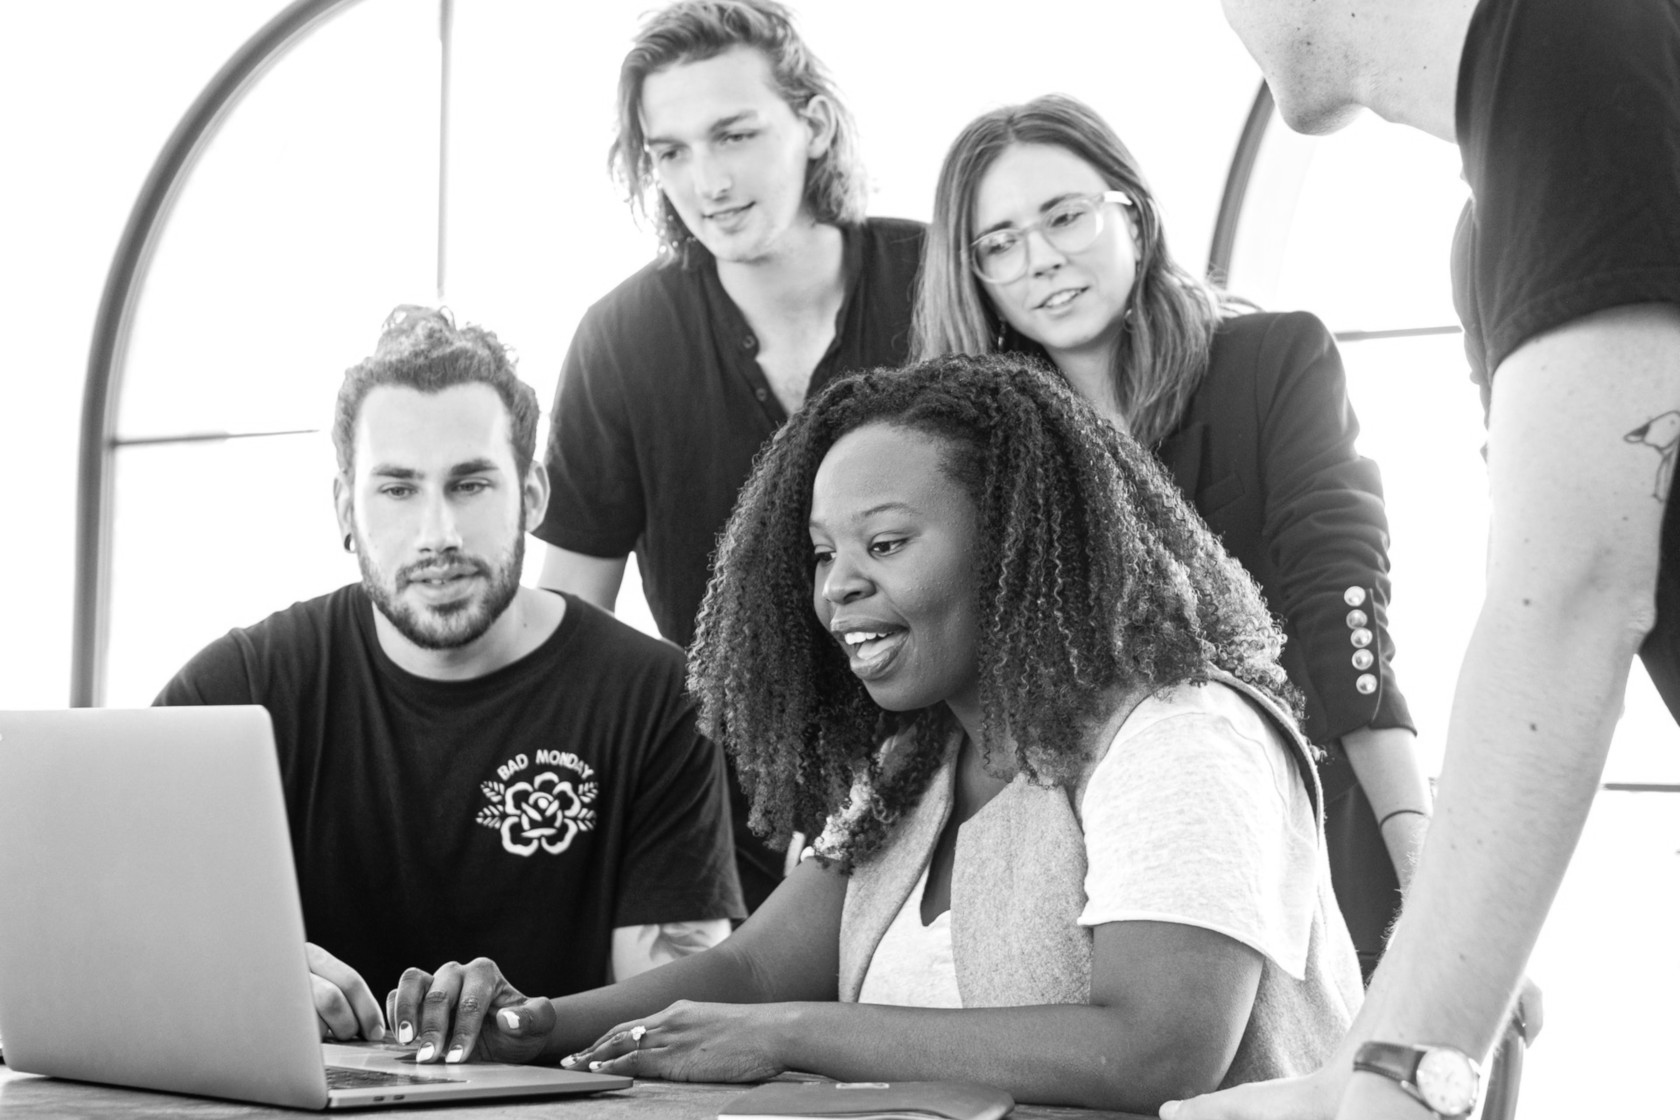

In [14]:
imagem = cv2.imread('/content/drive/MyDrive/images/people1.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
print(imagem.shape)
print(imagem_cinza.shape)
cv2_imshow(imagem_cinza)

In [15]:
deteccoes = detector_facial.detectMultiScale(imagem_cinza)
print(deteccoes)
len(deteccoes)

[[ 610   69  192  192]
 [ 956  147  194  194]
 [ 982  462   27   27]
 [ 328  404  215  215]
 [ 765  472  194  194]
 [1328  608   53   53]
 [1298  734   37   37]]


7

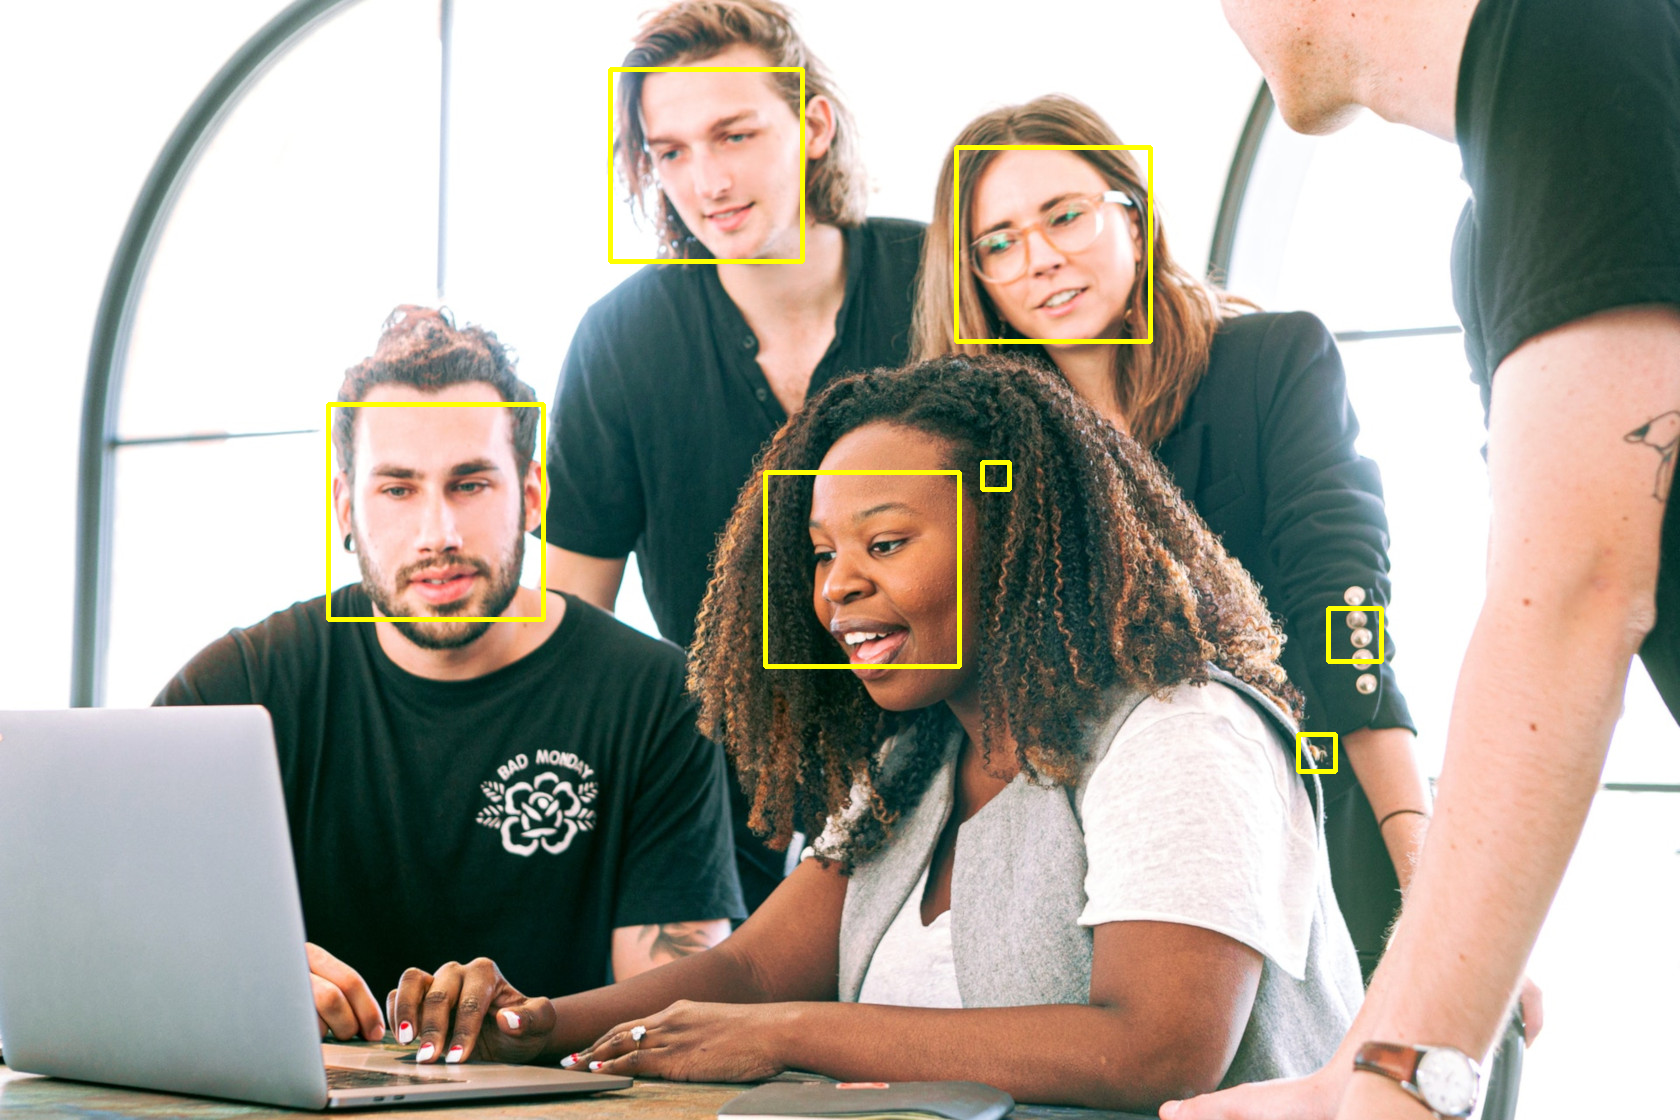

In [16]:
for(x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 255), 3)

cv2_imshow(imagem)

Aqui foi possível verificar um problema de detecção devido a alta resolução da imagem. O algoritmo acabou entendendo que alguns conjuntos de pixels seriam parecidos com uma face.

## Redimensionar manualmente

(480, 600, 3)


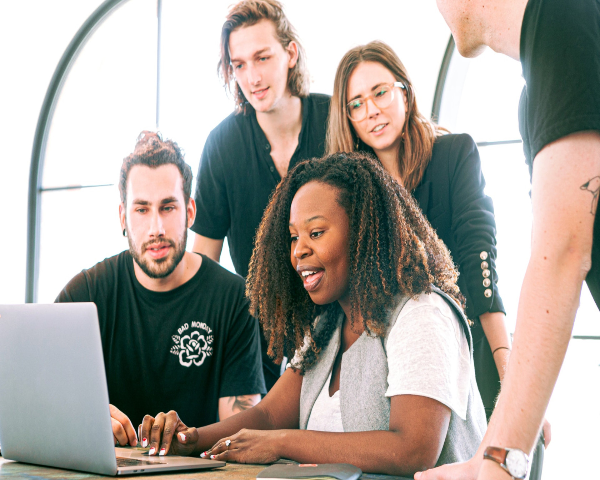

In [17]:
imagem = cv2.imread('/content/drive/MyDrive/images/people1.jpg')
imagem_redimensionada = cv2.resize(imagem, (600, 480))
print(imagem_redimensionada.shape)
cv2_imshow(imagem_redimensionada)

### Evitar distorções calculando proporções

In [18]:
nova_largura = 600
proporcao = 1680/1120

nova_altura = int(nova_largura / proporcao)
print(nova_altura)

400


(400, 600, 3)


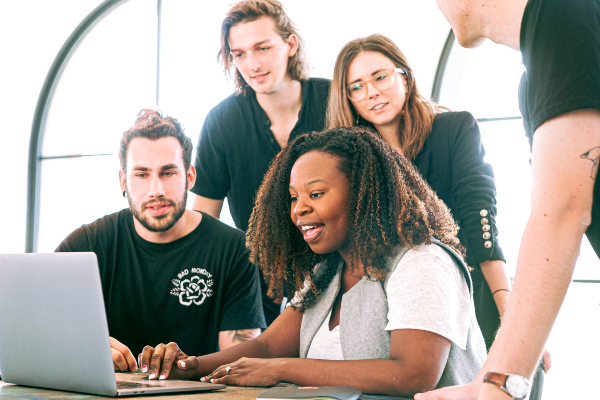

In [19]:
imagem_redimensionada = cv2.resize(imagem, (600, 400))
print(imagem_redimensionada.shape)
cv2_imshow(imagem_redimensionada)

## Redimensionar utilizando escala

(560, 840, 3)


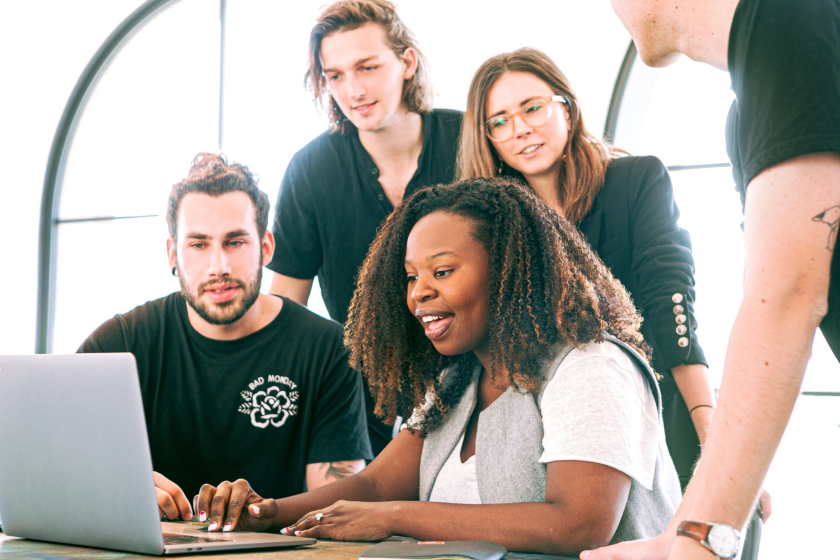

In [20]:
imagem = cv2.imread('/content/drive/MyDrive/images/people1.jpg')

# Utilizando parâmetros de escala para controlar o tamanho da imagem.
imagem_escala = cv2.resize(imagem, None, fx=0.5, fy=0.5)

print(imagem_escala.shape)
cv2_imshow(imagem_escala)

## Nova detecção

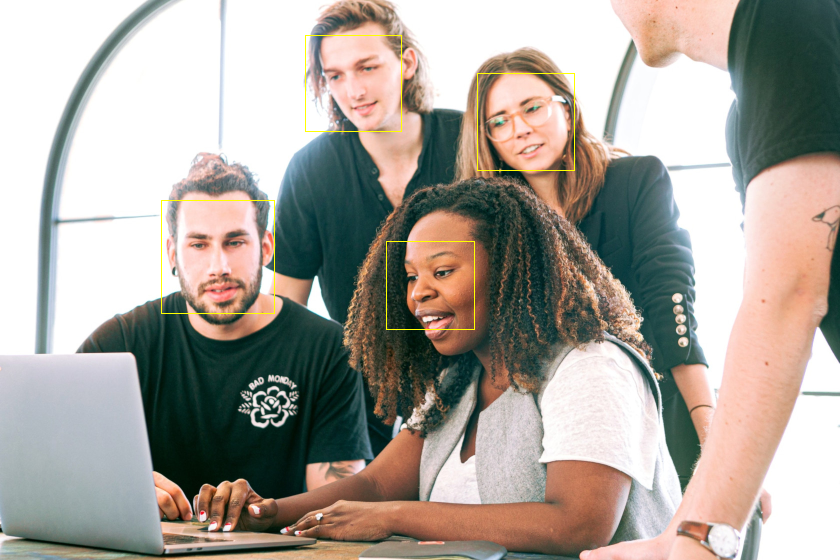

In [21]:
imagem_escala_cinza = cv2.cvtColor(imagem_escala, cv2.COLOR_BGR2GRAY)
deteccoes = detector_facial.detectMultiScale(imagem_escala_cinza)

for (x, y, w, h) in deteccoes:
  cv2.rectangle(imagem_escala, (x, y), (x + w, y + h), (0, 255, 255), 1)

cv2_imshow(imagem_escala)

# Parâmetros Haarcascade

##**scaleFactor**
- Utilizar caso as faces sejam muito pequenas ou muito grandes;
- Controla a **taxa de redução** da imagem em cada iteração durante o processo de detecção de objetos.
- Funcionamento:
    - A imagem é redimensionada em múltiplas escalas.
    - O algoritmo aplica a detecção em cada escala.
    - Um scaleFactor de 1.2 significa que a imagem é reduzida em 20% a cada iteração.

- Valor --> Deve ser maior que 1 (vem 1.1 por padrão)
- Quanto menor o tamanho das faces, menor o scaleFactor

(500, 600)


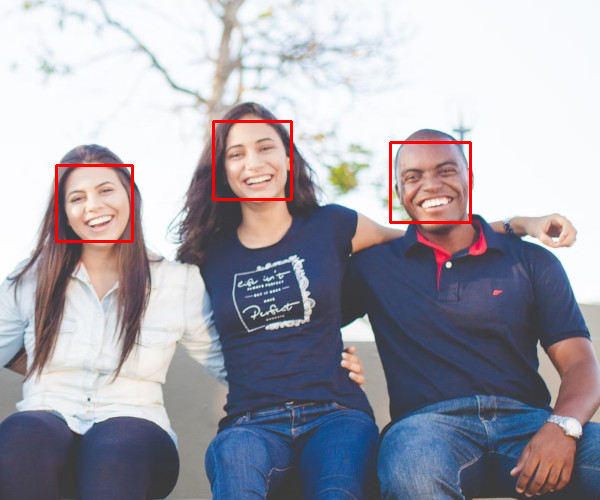

In [22]:
imagem = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
print(imagem_cinza.shape)

deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.2)

for(x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(imagem)

## minNeighbors
- Controle quantos vizinhos cada janela deve ter para que a área da imagem seja considerada uma face.
- Determina o número de concorrentes para escolher o melhor retângulo.
- Quanto menor o valor, mais confiança o algoritmo terá nas detecções.

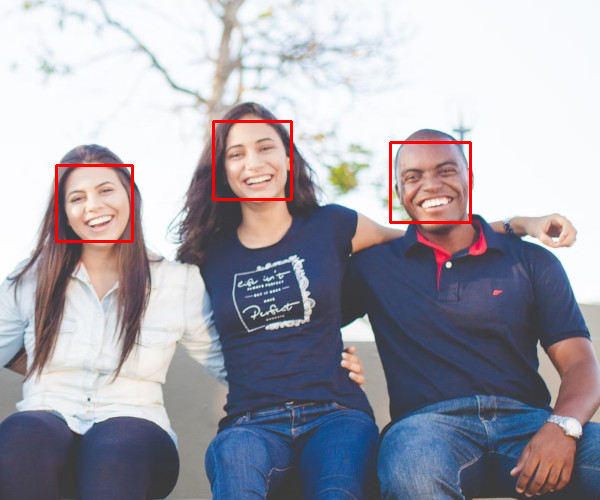

In [29]:
imagem = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.2, minNeighbors=4)

for(x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(imagem)

## minSize and maxSize
- Realiza uma filtragem nos Bounding Boxes pelas suas dimensões.
- Interessante para detecções pela webcam, já que desejamos reconhecer apenas quem está mais próximo.

89 89
85 85
88 88
83 83


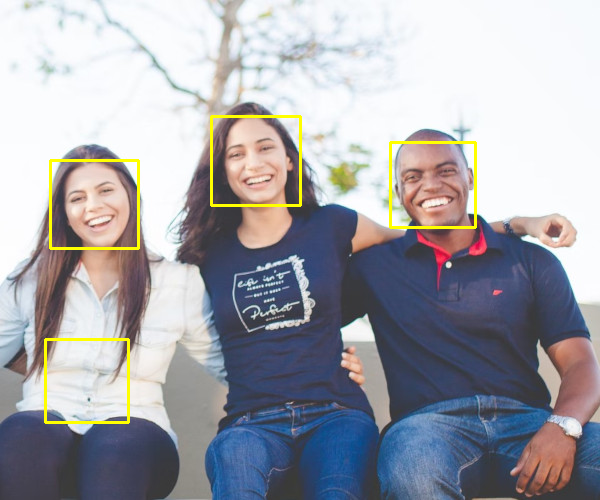

In [32]:
imagem = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aceitar apenas Bounding Boxes maiores que 76.
deteccoes = detector_facial.detectMultiScale(imagem_cinza, minSize=(76, 76))

for (x, y, w, h) in deteccoes:
  print(w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 255), 2)

cv2_imshow(imagem)

66 66
64 64
61 61
51 51


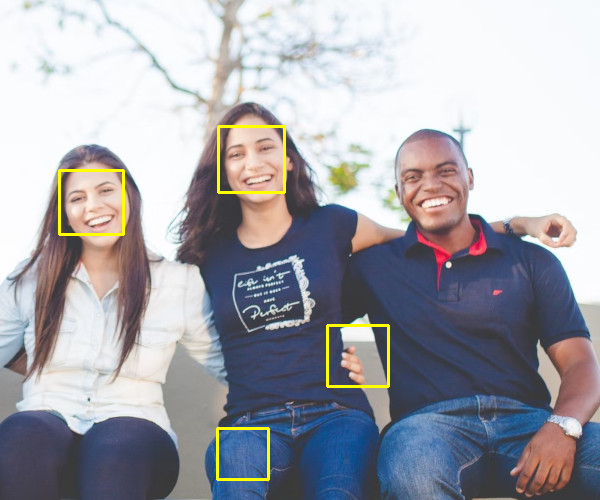

In [33]:
imagem = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aceitar apenas Bounding Boxes menores que 70.
deteccoes = detector_facial.detectMultiScale(imagem_cinza, maxSize=(70, 70))

for (x, y, w, h) in deteccoes:
  print(w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 255), 2)

cv2_imshow(imagem)

90 90
63 63
64 64
58 58
73 73
96 96


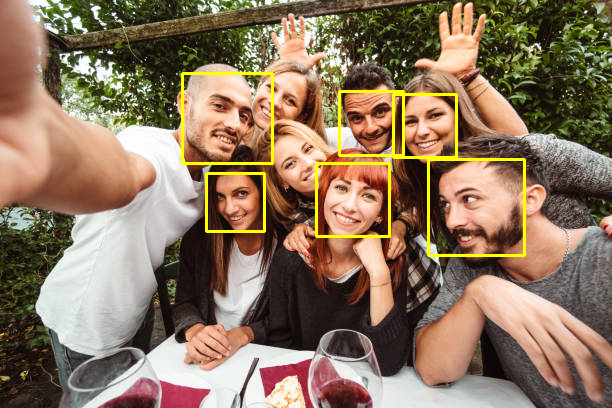

In [45]:
imagem = cv2.imread('/content/drive/MyDrive/images/people3.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

deteccoes = detector_facial.detectMultiScale(
    imagem_cinza,
    scaleFactor=1.1,
    minSize=(50, 50),
    minNeighbors=3
)

for(x, y, w, h) in deteccoes:
  print(w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 255), 2)

cv2_imshow(imagem)